In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
#import r2
from sklearn.metrics import r2_score

import env
import wrangle as w
import explore as e
import prepare as p
import evaluate as eva

import warnings
warnings.filterwarnings("ignore")

# 1
- Load your zillow dataset.

In [2]:
# get data
df = w.wrangle_zillow()
df

csv file found and loaded


,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
4,296425.0,4.0,2.0,3633.0,2005.0,LA,0,0
6,847770.0,3.0,4.0,1620.0,2011.0,LA,0,0
7,646760.0,3.0,2.0,2077.0,1926.0,LA,0,0
11,5328.0,0.0,0.0,1200.0,1972.0,LA,0,0
14,6920.0,0.0,0.0,171.0,1973.0,LA,0,0
...,...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,LA,0,0
2152858,960756.0,4.0,3.0,2262.0,2015.0,Orange,1,0
2152859,536061.0,4.0,4.5,3127.0,2014.0,Orange,1,0
2152861,424353.0,3.0,2.5,1974.0,2015.0,Orange,1,0


In [3]:
# split into train validate and test
train, validate, test = p.split_data(df)
train

,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
731916,148309.0,3.0,2.0,1488.0,1980.0,LA,0,0
1286889,199476.0,2.0,1.0,864.0,1947.0,LA,0,0
1105466,921624.0,4.0,3.0,2532.0,1987.0,LA,0,0
1535462,311969.0,2.0,1.0,1144.0,1951.0,LA,0,0
1948233,1155354.0,3.0,3.5,2840.0,2005.0,Orange,1,0
...,...,...,...,...,...,...,...,...
1650719,96289.0,1.0,1.0,811.0,1942.0,LA,0,0
592897,870000.0,4.0,3.5,2468.0,1981.0,Ventura,0,1
1483205,649000.0,4.0,3.0,2610.0,1982.0,Orange,1,0
1478881,44892.0,3.0,1.0,1264.0,1942.0,LA,0,0


# 2
- Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.



In [4]:

# make it
lr = LinearRegression()
# fit it to training data
lr.fit(train[['sqft']], train.taxvalue)
# use it
# we will use lm.predict to make predictions 
yhat = lr.predict(train[['sqft']])
yhat

array([325854.85101281, 179159.6946298 , 571287.13188437, ...,
       589624.02643225, 273195.05128558, 785922.83345118])

# 3
- Plot the residuals for the linear regression model that you made.



In [5]:
baseline = train.taxvalue.mean()
baseline

394704.71481701365

In [6]:
residuals = train.taxvalue - yhat
residuals

731916    -177545.851013
1286889     20316.305370
1105466    350336.868116
1535462     66984.555711
1948233    511659.643491
               ...      
1650719    -70411.009873
592897     313758.525181
1483205     59375.973568
1478881   -228303.051286
1858243     31878.166549
Name: taxvalue, Length: 1254875, dtype: float64

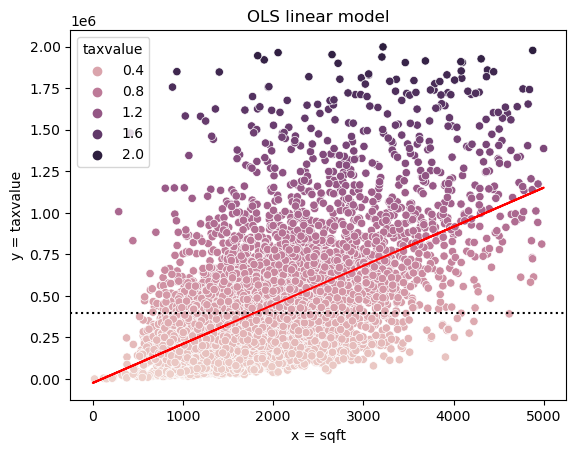

In [7]:
# baseline
plt.axhline(baseline, ls=':', color='black')
#scatter is my actuals
sns.scatterplot(x = train.sqft.sample(100000), y = train.taxvalue.sample(100000), hue=train.taxvalue)

#lineplot is my regression line
plt.plot(train.sqft, yhat, color='red')

plt.xlabel('x = sqft')
plt.ylabel('y = taxvalue')
plt.title('OLS linear model')
plt.show()

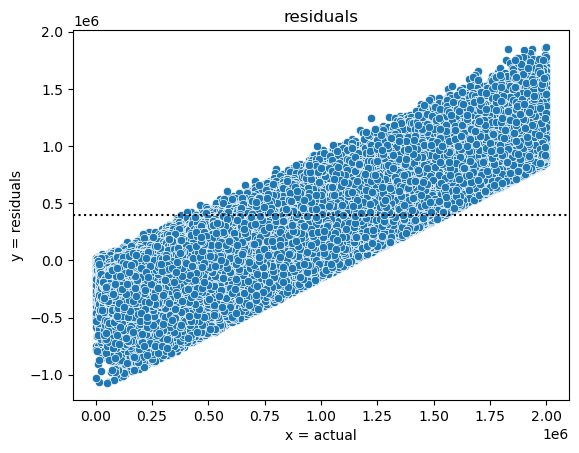

In [8]:
baseline
plt.axhline(baseline, ls=':', color='black')
#scatter is my residuals
sns.scatterplot(y = train.taxvalue - yhat, x = train.taxvalue)

plt.xlabel('x = actual')
plt.ylabel('y = residuals')
plt.title('residuals')
plt.show()

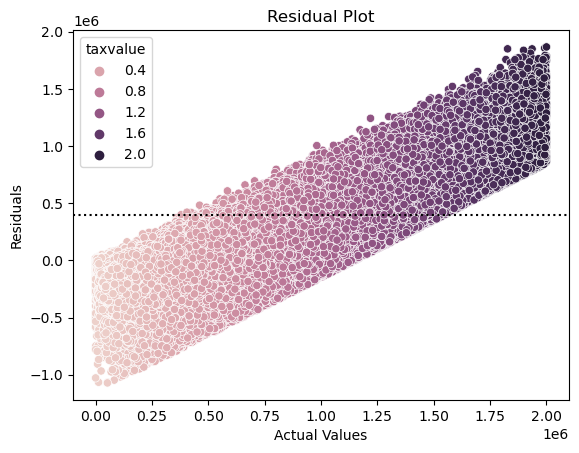

In [9]:
eva.plot_residuals(train.taxvalue, yhat)

# 4
-Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [10]:
SSE, ESS, TSS, MSE, RMSE = eva.regression_errors(train.taxvalue, yhat)
print('SSE =',SSE)
print('ESS =',ESS)
print('TSS =',TSS)
print('MSE =',MSE)
print('RMSE =',RMSE)

SSE = 8.02699488593748e+16
ESS = 3.83140681708042e+16
TSS = 1.1858401703017877e+17
MSE = 63966489777.36563
RMSE = 252915.97374892246


# 5 
-Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [11]:
SSE2, MSE2, RMSE2 = eva.baseline_mean_errors(train.taxvalue)
print('SSE =',SSE2)
print('MSE =',MSE2)
print('RMSE =',RMSE2)


SSE = 1.1858401703017877e+17
MSE = 94498668815.76126
RMSE = 307406.3577998368


# 6
-Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [12]:
eva.better_than_baseline(train.taxvalue, yhat, baseline)

True

# 7
-What is the amount of variance explained in your model?

In [13]:
#use r2_score
r2_score(train.taxvalue, yhat)

0.32309639300761184

# 8
- Is your model better than the baseline model?

According to the RMSE my model performs better than the baseline, however the $R^2$ value is very low meaning the independent variable 'sqft' doesn't account for much of the variance in 'taxvalue'.

# Do it again but with scaled data

In [14]:
## scale
X_train_scaled, X_validate_scaled, X_validate_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)
X_train_scaled

,bedrooms,bathrooms,sqft,built,Orange,Ventura
0,0.1875,0.100,0.297459,0.832558,0.0,0.0
1,0.1250,0.050,0.172635,0.679070,0.0,0.0
2,0.2500,0.150,0.506301,0.865116,0.0,0.0
3,0.1250,0.050,0.228646,0.697674,0.0,0.0
4,0.1875,0.175,0.567914,0.948837,1.0,0.0
...,...,...,...,...,...,...
1254870,0.0625,0.050,0.162032,0.655814,0.0,0.0
1254871,0.2500,0.175,0.493499,0.837209,0.0,1.0
1254872,0.2500,0.150,0.521904,0.841860,1.0,0.0
1254873,0.1875,0.050,0.252651,0.655814,0.0,0.0


# Fit Model
- Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.


In [15]:
# make it
lr = LinearRegression()
# fit it to training data
lr.fit(X_train_scaled[['sqft']], y_train)
# use it
# we will use lm.predict to make predictions 
yhat = lr.predict(X_train_scaled[['sqft']])
yhat

array([325854.85101281, 179159.6946298 , 571287.13188438, ...,
       589624.02643225, 273195.05128558, 785922.83345118])

In [16]:
baseline = y_train.mean()
baseline

394704.71481701365

In [17]:
residuals = y_train - yhat
residuals

731916    -177545.851013
1286889     20316.305370
1105466    350336.868116
1535462     66984.555711
1948233    511659.643491
               ...      
1650719    -70411.009873
592897     313758.525181
1483205     59375.973568
1478881   -228303.051286
1858243     31878.166549
Name: taxvalue, Length: 1254875, dtype: float64

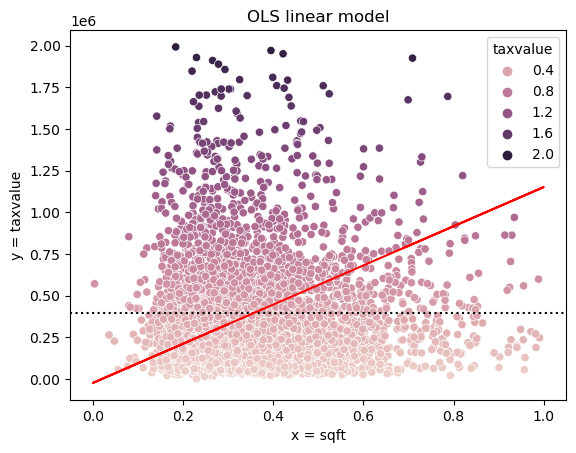

In [18]:
# baseline
plt.axhline(baseline, ls=':', color='black')
#scatter is my actuals
sns.scatterplot(x = X_train_scaled.sqft.sample(100000), y = y_train.sample(100000), hue=y_train)

#lineplot is my regression line
plt.plot(X_train_scaled.sqft, yhat, color='red')

plt.xlabel('x = sqft')
plt.ylabel('y = taxvalue')
plt.title('OLS linear model')
plt.show()

# plot residuals

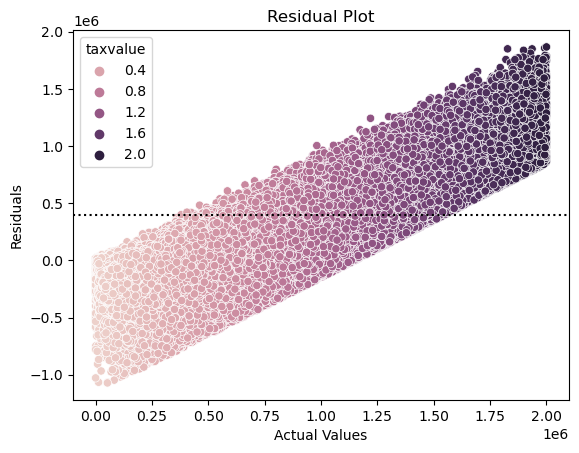

In [19]:
eva.plot_residuals(y_train, yhat)

In [20]:
SSE3, ESS3, TSS3, MSE3, RMSE3 = eva.regression_errors(y_train, yhat)
print('SSE =',SSE3)
print('ESS =',ESS3)
print('TSS =',TSS3)
print('MSE =',MSE3)
print('RMSE =',RMSE3)

SSE = 8.02699488593748e+16
ESS = 3.831406817080416e+16
TSS = 1.1858401703017877e+17
MSE = 63966489777.36565
RMSE = 252915.9737489225


In [21]:
SSE4, MSE4, RMSE4 = eva.baseline_mean_errors(y_train)
print('SSE =',SSE4)
print('MSE =',MSE4)
print('RMSE =',RMSE4)

SSE = 1.1858401703017877e+17
MSE = 94498668815.76126
RMSE = 307406.3577998368


In [22]:
eva.better_than_baseline(y_train, yhat, baseline)

True

# variance or R^2 value of the scaled data model

In [23]:
r2_score(y_train, yhat)

0.32309639300761184

- Whether using the unscaled train data or the scaled training data results in the same outcomes.

# Non-scaled vs. scaled

### Non-scaled
    -- Model
- Non-Scaled Data (Sqft and Taxvalue)
    - SSE = 7.994727608553005e+16
    - ESS = 3.8192404079550296e+16
    - TSS = 1.1813968016508034e+17
    - MSE = 63786922944.46919
    - RMSE = 252560.73120037722
- Baseline
    - SSE = 1.1813968016508034e+17
    - MSE = 94259204870.36513
    - RMSE = 307016.61986017163
- Variance
    - R^2 = 0.32328176296213795

### Scaled
    -- Model
- Scaled data (Sqft and Taxvalue)
    - SSE = 7.994727608553005e+16
    - ESS = 3.819240407954998e+16
    - TSS = 1.1813968016508034e+17
    - MSE = 63786922944.46919
    - RMSE = 252560.73120037722
- Baseline
    - SSE = 1.1813968016508034e+17
    - MSE = 94259204870.36513
    - RMSE = 307016.61986017163
- Variance
    - R^2 = 0.32328176296213795

# Bonus #1
Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [24]:
from pydataset import data

In [25]:
#get data
df = data('tips')
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
#split data
train, validate, test = p.split_data(df)
train

,total_bill,tip,sex,smoker,day,time,size
225,13.42,1.58,Male,Yes,Fri,Lunch,2
182,23.33,5.65,Male,Yes,Sun,Dinner,2
103,44.30,2.50,Female,Yes,Sat,Dinner,3
165,17.51,3.00,Female,Yes,Sun,Dinner,2
74,25.28,5.00,Female,Yes,Sat,Dinner,2
175,16.82,4.00,Male,Yes,Sun,Dinner,2
4,23.68,3.31,Male,No,Sun,Dinner,2
150,7.51,2.00,Male,No,Thur,Lunch,2
86,34.83,5.17,Female,No,Thur,Lunch,4
41,16.04,2.24,Male,No,Sat,Dinner,3


In [27]:
#make the model
lr = LinearRegression()
# fit it to training data
lr.fit(train[['total_bill']], train.tip)
# use it
# we will use lm.predict to make predictions 
yhat = lr.predict(train[['total_bill']])
yhat

array([2.37747501, 3.44395961, 5.70068838, 2.8176286 , 3.65381279,
       2.74337286, 3.48162557, 1.74145847, 4.68155526, 2.65943159,
       2.75951541, 1.71347804, 2.27093417, 3.26854388, 4.46632124,
       5.10126161, 3.42674089, 3.11680389, 2.81224775, 3.24702048,
       2.22788736, 2.22681119, 2.9543022 , 2.85852306, 2.81332392,
       4.66003186, 4.72783058, 2.89618902, 2.28922906, 2.0643095 ,
       3.52467237, 1.85660867, 5.17551735, 3.38907494, 2.1547078 ,
       2.01695802, 2.21066864, 4.20481189, 2.84668519, 2.13533673,
       1.97498738, 3.06514773, 3.8442949 , 2.85098987, 2.68956435,
       3.57202386, 3.99388255, 3.19428814, 2.79072434, 1.96637802,
       2.49154905, 2.27631502, 2.86175157, 2.55396691, 3.13402261,
       2.54858606, 4.1542319 , 2.01911036, 2.37209416, 1.84907548,
       4.42004592, 3.96482596, 2.58840436, 2.24187758, 3.06084305,
       3.38154174, 2.5184533 , 6.13438494, 2.18268822, 1.96099717,
       2.03848142, 2.45603543, 2.93923582, 2.94461667, 2.63037

In [28]:
baseline = train.tip.mean()
baseline

2.9810958904109603

In [29]:
residuals = train.tip - yhat
residuals

225   -0.797475
182    2.206040
103   -3.200688
165    0.182371
74     1.346187
175    1.256627
4     -0.171626
150    0.258542
86     0.488445
41    -0.419432
19     0.740485
173    3.436522
119   -0.470934
29     1.031456
238   -3.296321
208   -2.101262
184    3.073259
61     0.093196
42    -0.272248
161    0.252980
98    -0.727887
71    -0.256811
244    0.045698
177   -0.858523
141    0.686676
180   -1.110032
12     0.272169
109    0.863811
237   -1.289229
76    -0.814310
120   -0.604672
223    0.063391
24     2.404483
130   -1.209075
101    0.345292
236   -0.766958
148   -0.580669
45     1.395188
35     0.423315
133   -0.635337
44    -0.654987
192    1.124852
144    1.155705
243   -1.100990
94     1.610436
166   -0.092024
193   -1.433883
99    -0.194288
153   -0.050724
179    2.033622
178   -0.491549
125    0.243685
77     0.218248
33     0.446033
228   -0.134023
70    -0.458586
117    0.915768
227   -0.019110
27    -0.372094
136   -0.599075
48     1.579954
215    2.535174
102    0

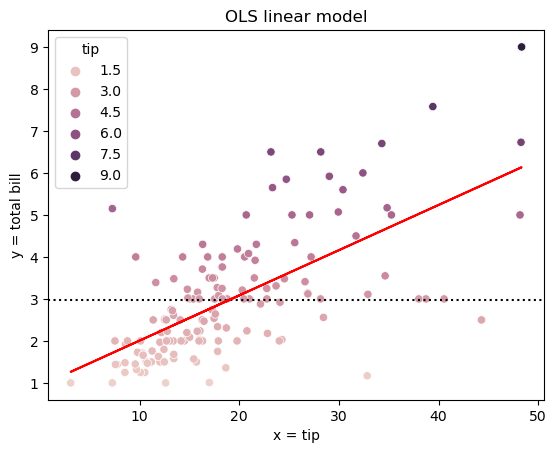

In [30]:
# baseline
plt.axhline(baseline, ls=':', color='black')
#scatter is my actuals
sns.scatterplot(x = train.total_bill, y = train.tip, hue=train.tip)

#lineplot is my regression line
plt.plot(train.total_bill, yhat, color='red')

plt.xlabel('x = tip')
plt.ylabel('y = total bill')
plt.title('OLS linear model')
plt.show()

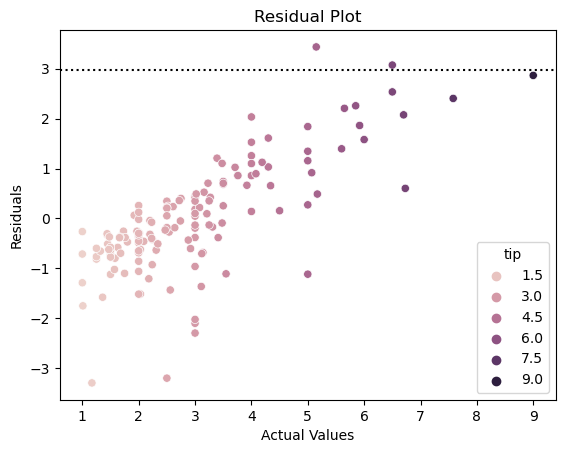

In [31]:
eva.plot_residuals(train.tip, yhat)

In [32]:
SSE3, ESS3, TSS3, MSE3, RMSE3 = eva.regression_errors(train.tip, yhat)
print('SSE =',SSE3)
print('ESS =',ESS3)
print('TSS =',TSS3)
print('MSE =',MSE3)
print('RMSE =',RMSE3)

SSE = 173.53107209489477
ESS = 133.9021525626395
TSS = 307.43322465753425
MSE = 1.1885689869513343
RMSE = 1.0902151104031417


In [33]:
SSE4, MSE4, RMSE4 = eva.baseline_mean_errors(y_train)
print('SSE =',SSE4)
print('MSE =',MSE4)
print('RMSE =',RMSE4)

SSE = 1.1858401703017877e+17
MSE = 94498668815.76126
RMSE = 307406.3577998368


In [34]:
eva.better_than_baseline(train.tip, yhat, baseline)

True

In [35]:
r2_score(train.tip, yhat)

0.43554873651603543

# Bonus #2
-Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. 

In [36]:
#get data
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [37]:
#split data
train, validate, test = p.split_data(df)
train

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
228,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
207,toyota,toyota tacoma 4wd,4.0,2008,6,auto(l5),4,16,20,r,pickup
41,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
105,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
210,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize
48,dodge,caravan 2wd,4.0,2008,6,auto(l6),f,16,23,r,minivan
227,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
141,mercury,mountaineer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv


In [38]:
#make the model
lr = LinearRegression()
# fit it to training data
lr.fit(train[['displ']], train.hwy)
# use it
# we will use lm.predict to make predictions 
yhat = lr.predict(train[['displ']])
yhat

array([29.88725583, 21.53482541, 24.19241691, 29.88725583, 29.12794398,
       24.95172877, 21.53482541, 27.22966434, 29.5075999 , 17.73826613,
       29.88725583, 16.97895427, 27.22966434, 29.5075999 , 26.09069655,
       24.19241691, 26.09069655, 30.64656769, 24.95172877, 16.21964242,
       14.32136278, 29.88725583, 27.60932026, 24.19241691, 21.53482541,
       29.12794398, 21.53482541, 23.43310505, 29.12794398, 13.18239499,
       26.47035248, 21.53482541, 29.88725583, 21.53482541, 16.21964242,
       14.32136278, 27.22966434, 16.21964242, 29.12794398, 16.59929834,
       22.29413727, 15.08067463, 16.21964242, 29.88725583, 19.25688984,
       25.33138469, 29.88725583, 27.22966434, 26.47035248, 18.87723391,
       25.33138469, 18.87723391, 27.22966434, 29.88725583, 30.64656769,
       16.59929834, 29.12794398, 26.09069655, 18.87723391, 26.47035248,
       27.60932026, 29.88725583, 29.88725583, 13.18239499, 27.60932026,
       27.60932026, 19.25688984, 26.09069655, 24.95172877, 24.19

In [39]:
baseline = train.hwy.mean()
baseline

23.864285714285714

In [40]:
residuals = train.hwy - yhat
residuals

228    -0.887256
207    -1.534825
41     -2.192417
105     4.112744
210    -0.127944
17      0.048271
48      1.465175
227     1.770336
223    11.492400
141    -0.738266
229    -0.887256
56      0.021046
145     4.770336
222    14.492400
232    -0.090697
42     -0.192417
212    -2.090697
103    -1.646568
155     1.048271
136    -0.219642
74      0.678637
8      -3.887256
143    -0.609320
193     2.807583
79     -2.534825
116    -3.127944
153    -1.534825
146     3.566895
11     -2.127944
26     12.817605
201    -6.470352
139    -2.534825
198     5.112744
94      2.465175
77      1.780358
64      0.678637
226     0.770336
137     1.780358
3       1.872056
30     -2.599298
47      0.705863
31     -0.080675
99      3.780358
9      -4.887256
96      2.743110
148     0.668615
107     6.112744
169    -1.229664
175    -6.470352
70     -6.877234
39     -1.331385
55     -6.877234
161    -3.229664
106     6.112744
104     1.353432
19      3.400702
208    -0.127944
221    -2.090697
65     -2.8772

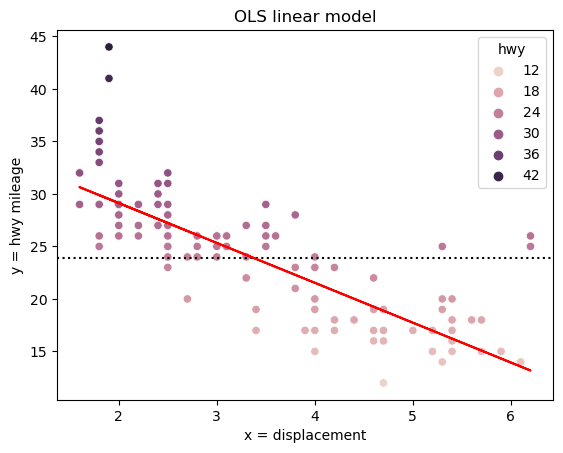

In [41]:
# baseline
plt.axhline(baseline, ls=':', color='black')
#scatter is my actuals
sns.scatterplot(x = train.displ, y = train.hwy, hue=train.hwy)

#lineplot is my regression line
plt.plot(train.displ, yhat, color='red')

plt.xlabel('x = displacement')
plt.ylabel('y = hwy mileage')
plt.title('OLS linear model')
plt.show()

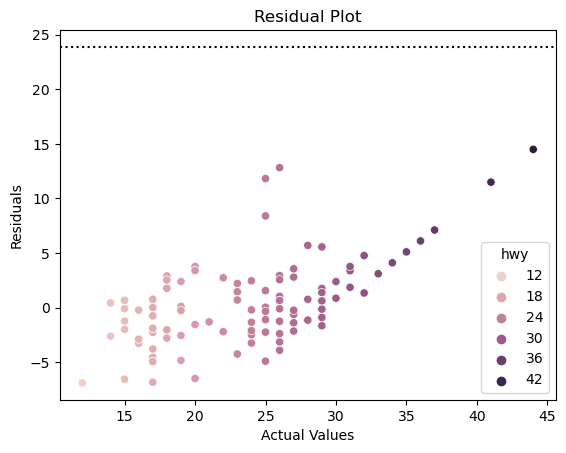

In [42]:
eva.plot_residuals(train.hwy, yhat)

In [43]:
SSE3, ESS3, TSS3, MSE3, RMSE3 = eva.regression_errors(train.hwy, yhat)
print('SSE =',SSE3)
print('ESS =',ESS3)
print('TSS =',TSS3)
print('MSE =',MSE3)
print('RMSE =',RMSE3)

SSE = 1889.752567286466
ESS = 3410.668861284964
TSS = 5300.421428571429
MSE = 13.498232623474763
RMSE = 3.673994096820892


In [44]:
SSE4, MSE4, RMSE4 = eva.baseline_mean_errors(train.hwy)
print('SSE =',SSE4)
print('MSE =',MSE4)
print('RMSE =',RMSE4)

SSE = 5300.421428571429
MSE = 37.86015306122447
RMSE = 6.153060462991118


In [45]:
eva.better_than_baseline(train.hwy, yhat, baseline)

True

In [46]:
r2_score(train.hwy, yhat)

0.6434712611529472